In [1]:
import sys
sys.path.insert(1, r'../Projects/datautils/')  # add to pythonpath
from datautils import fileutils, unicode_tr

In [2]:
import json
import re
import pandas as pd
import importlib
from collections import namedtuple
importlib.reload(fileutils)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.set_option('display.max_colwidth',2000)

In [4]:
def del_keys_with_default(node):
    if isinstance(node, list) or isinstance(node, str):
        if len(node) > 0:
            return node
        return None
    elif isinstance(node, int):
        if node > 0:
            return node
        return None
    elif isinstance(node, type(None)):
        return None
    else:
        dupe_node = {}
        for key, val in node.items():
            cur_node = del_keys_with_default(val)
            if cur_node:
                dupe_node[key] = cur_node
        return dupe_node or None

In [16]:
tweet_dict = {}
error_list = []
error_tuple = namedtuple('Error', ['file', 'message','line'])
total_lines = 0
tweet_folder = "/scratch/hurrial/tweet_collect/" # this is on fluttershy
# previous files:
# rohingya_history.json,rohingya_stream.json,genocide_history.json,genocide_tweets.txt,rohingya_genocide_history.json
for fname in ["genocide_stream2.json"]:

    with open(tweet_folder+fname) as myfile:
        for line in myfile:
            total_lines += 1
            try:
                twjson = json.loads(line)
                tweet_dict[twjson['id_str']] = del_keys_with_default(twjson)
                #print(len(line),len(json.dumps(del_keys_with_default(twjson))))#gain is %20 in terms of char count
            except:
                error_list.append(error_tuple(file=fname, message=sys.exc_info(),line=twjson))

print("number of errors",len(error_list))
print("number of total lines:", total_lines)
print("number of unique tweets:", len(tweet_dict))
# number of errors 6
# number of total lines: 1079531
# number of unique tweets: 600801

number of errors 0
number of total lines: 306
number of unique tweets: 306


In [17]:
with open("all_genocide_tweets2.json",'w') as fw:
    for k,v in tweet_dict.items():
        fw.write(json.dumps(v)+'\n')

In [18]:
importlib.reload(fileutils)
tweet_list = fileutils.read_json_tweets_file("all_genocide_tweets.json", reqlang='en')
tweet_list2 = fileutils.read_json_tweets_file("all_genocide_tweets2.json", reqlang='en')

processed file: all_genocide_tweets.json
Language of the processed tweets: en
Counter({'en': 775096, 'in': 152935, 'fr': 29480, 'und': 19069, 'es': 13428, 'tl': 10910, 'ja': 8075, 'nl': 6253, 'tr': 4129, 'de': 2845, 'ar': 1958, 'it': 1640, 'ru': 1195, 'pt': 1164, 'et': 1109, 'ht': 930, 'ro': 844, 'bs': 821, 'ur': 778, 'da': 712, 'hi': 710, 'hr': 611, 'sk': 509, 'sl': 472, 'sv': 374, 'th': 372, 'ta': 207, 'ko': 176, 'bn': 147, 'zh': 131, 'uk': 126, 'no': 126, 'pl': 121, 'el': 118, 'hy': 116, 'fi': 115, 'hu': 91, 'cy': 86, 'fa': 65, 'my': 59, 'vi': 51, 'lt': 49, 'lv': 26, 'bg': 24, 'sr': 23, 'ml': 17, 'is': 12, 'iw': 8, 'mr': 3, 'pa': 3, 'ckb': 1, 'ps': 1, 'ne': 1, 'km': 1, 'gu': 1, 'bo': 1, 'si': 1, 'am': 1})
processed file: all_genocide_tweets2.json
Language of the processed tweets: en
Counter({'en': 276, 'und': 9, 'de': 8, 'es': 4, 'ja': 2, 'fr': 2, 'ro': 1, 'bs': 1, 'tl': 1, 'nl': 1, 'tr': 1})


In [14]:
with open("all_genocide_tweets_summary2.json",'w') as fw:
    for tw in tweet_list+tweet_list2:
        tw["created_at"] = datetime.datetime.strftime(tw["created_at"], "%a %b %d %H:%M:%S +0000 %Y")
        fw.write(json.dumps(tw)+'\n')

In [845]:
tweet_list[0]

{'created_at': 'Mon Jun 01 20:41:09 +0000 2015',
 'device': 'Twitter for Android',
 'entity_hashtags': ['Rohingya', 'UNMustSaveBurmaMuslims'],
 'entity_mentions': ['RumBegum'],
 'entity_type': 'photo',
 'id_str': '605474184714543104',
 'is_retweet': True,
 'text': "RT @RumBegum: This situation won't go viral because it's Muslims being killed not Muslims killing #Rohingya #UNMustSaveBurmaMuslims http://…",
 'user_followers': 403,
 'user_following': 283,
 'user_id': '2831033527'}

In [852]:
tsttweetlist = []
with open("all_genocide_tweets_summary.json") as f:
    for l in f:
        tw = json.loads(l)
        tw["created_at"] = datetime.datetime.strptime(tw["created_at"], "%a %b %d %H:%M:%S +0000 %Y")
        tsttweetlist.append(tw)

with open("all_genocide_tweets_summary2.json") as f:
    for l in f:
        tw = json.loads(l)
        tw["created_at"] = datetime.datetime.strptime(tw["created_at"], "%a %b %d %H:%M:%S +0000 %Y")
        tsttweetlist.append(tw)

In [855]:
tsttweetlist[0]

{'created_at': datetime.datetime(2015, 6, 1, 20, 41, 9),
 'device': 'Twitter for Android',
 'entity_hashtags': ['Rohingya', 'UNMustSaveBurmaMuslims'],
 'entity_mentions': ['RumBegum'],
 'entity_type': 'photo',
 'id_str': '605474184714543104',
 'is_retweet': True,
 'text': "RT @RumBegum: This situation won't go viral because it's Muslims being killed not Muslims killing #Rohingya #UNMustSaveBurmaMuslims http://…",
 'user_followers': 403,
 'user_following': 283,
 'user_id': '2831033527'}

In [829]:
gncdTweetsDF = pd.DataFrame(tweet_list)
print(len(gncdTweetsDF))

612412


In [856]:
gncdTweetsDF.head()

,coordinates,country,device,entity_hashtags,entity_mentions,entity_type,entity_urls,id_str,in_reply_to_user_id,is_retweet,text,user_followers,user_following,user_id,is_notrt,tw_cnt
created_at,,,,,,,,,,,,,,,,
2015-06-22 19:59:56,NaN,NaN,Twitter Web Client,"[Biafrans, Buhari, Biafraland]",[eurireland],NaN,NaN,613073957319782400,44890795,False,"@eurireland The second GENOCIDE against #Biafrans as promised by #Buhari has begun, 3 days of unreported aerial Bombardment in #Biafraland",3,15,2188829916,True,1
2015-06-01 20:54:21,NaN,NaN,IFTTT,[ModiMinistry],NaN,NaN,[bit.ly/1dHDSWA],605477505651359744,NaN,False,#ModiMinistry Obama says Myanmar needs to end discrimination of Rohingya to succeed\n| Reuters http://t.co/zmagjFtMH8,1749,14,2425268995,True,1
2015-06-24 08:40:46,NaN,NaN,Twitter for BlackBerry,"[Biafra, Buhari, Biafraland]",[UNPeacekeeping],NaN,NaN,613627816551313408,46003622,False,@UNPeacekeeping The Second Genocide has began on #Biafra as promised by #Buhari 3 days of Unreported bombardment on #Biafraland,3,23,3343139879,True,1
2015-06-16 17:14:23,NaN,NaN,Twitter for Android,NaN,[balkannews],NaN,NaN,610857967706079232,220487383,False,@balkannews Anti Serbian as always historicaly but no recognition of Turkish genocide of Armenians - politically inconvenient,8,56,498854802,True,1
2015-06-22 11:11:12,NaN,NaN,Twitter Web Client,[globalwarming],NaN,NaN,NaN,612940896556834816,NaN,False,"the caffeinated ""civil"" society will now blame the ""elites"" that enjoy aircondition forn being guilty of ""genocide"" hmm #globalwarming 1/2",320,1429,2417189972,True,1


In [830]:
gncdTweetsDF.drop_duplicates(["id_str"], inplace=True)
print(len(gncdTweetsDF))

612412


In [831]:
# eliminate retweets
rttext = ~gncdTweetsDF["text"].str.contains(r"\bRT @", case=False)
rtfield = gncdTweetsDF["is_retweet"]==False
gncdTweetsDF["is_notrt"] = rtfield.values & rttext.values
gncdTweetsDF = gncdTweetsDF[gncdTweetsDF["is_notrt"]]
gncdTweetsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274771 entries, 4 to 612411
Data columns (total 16 columns):
coordinates            1565 non-null object
country                14811 non-null object
created_at             274771 non-null datetime64[ns]
device                 274769 non-null object
entity_hashtags        114752 non-null object
entity_mentions        111481 non-null object
entity_type            35251 non-null object
entity_urls            148643 non-null object
id_str                 274771 non-null object
in_reply_to_user_id    82660 non-null float64
is_retweet             274771 non-null bool
text                   274771 non-null object
user_followers         271348 non-null float64
user_following         252139 non-null float64
user_id                274771 non-null object
is_notrt               274771 non-null bool
dtypes: bool(2), datetime64[ns](1), float64(3), object(10)
memory usage: 32.0+ MB


In [832]:
# tweets that contain just genocide, no rohingya
len(gncdTweetsDF[gncdTweetsDF.text.str.contains("genocide", case=False) & ~gncdTweetsDF.text.str.contains("rohingya", case=False)])

192889

In [833]:
# tweets that contain just rohingya no genocide
len(gncdTweetsDF[gncdTweetsDF.text.str.contains("rohingya", case=False) & ~gncdTweetsDF.text.str.contains("genocide", case=False)])

59242

In [834]:
# tweets that contain both genocide and rohingya
len(gncdTweetsDF[(gncdTweetsDF.text.str.contains("rohingya", case=False)) & (gncdTweetsDF.text.str.contains("genocide", case=False))])

7503

In [835]:
gncdTweetsDF["tw_cnt"] = 1

In [836]:
gncdTweetsDF.set_index("created_at",inplace=True)

(<matplotlib.text.Text at 0x2b5d76bbc588>,
 <matplotlib.text.Text at 0x2b5d76bbf518>)

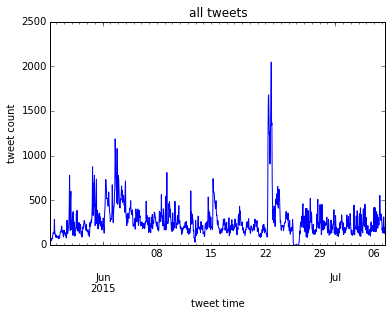

In [857]:
gncdTweetsDF.tw_cnt.resample('1H', how='sum').fillna(0).plot(title="all tweets", grid=False)
plt.xlabel("tweet time"),plt.ylabel("tweet count")

(<matplotlib.text.Text at 0x2b5ba7565b70>,
 <matplotlib.text.Text at 0x2b5adf299390>)

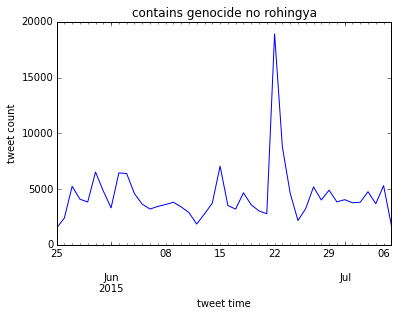

In [838]:
gncdTweetsDF[gncdTweetsDF.text.str.contains("genocide", case=False) & ~gncdTweetsDF.text.str.contains("rohingya", case=False)].tw_cnt.resample('24H', how='sum').fillna(0).plot(grid=False, title="contains genocide no rohingya")
plt.xlabel("tweet time"),plt.ylabel("tweet count")

(<matplotlib.text.Text at 0x2b5ba74df438>,
 <matplotlib.text.Text at 0x2b5ba87a3390>)

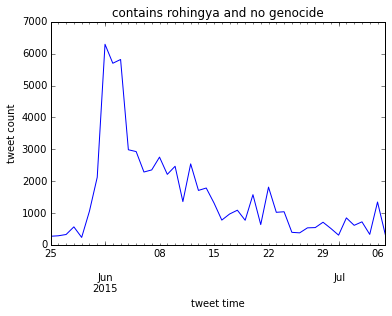

In [839]:
gncdTweetsDF[gncdTweetsDF.text.str.contains("rohingya", case=False)].tw_cnt.resample('24H', how='sum').fillna(0).plot(grid=False, title="contains rohingya and no genocide")
plt.xlabel("tweet time"),plt.ylabel("tweet count")

(<matplotlib.text.Text at 0x2b5c19a45da0>,
 <matplotlib.text.Text at 0x2b5ab6a3bb70>)

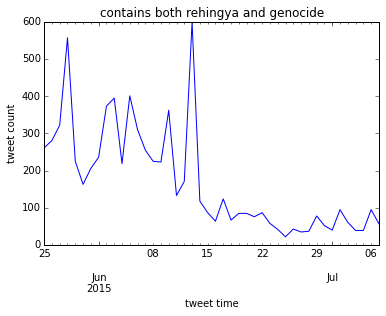

In [840]:
gncdTweetsDF[gncdTweetsDF.text.str.contains("rohingya", case=False) & gncdTweetsDF.text.str.contains("genocide", case=False)]\
    .tw_cnt.resample('24H', how='sum').fillna(0).plot(grid=False, title="contains both rehingya and genocide")
plt.xlabel("tweet time"),plt.ylabel("tweet count")

## LDA on Tweets of Genocide/Rohingya

In [ ]:
#source: http://nasdag.github.io/nasdag/arabic-reputation.html

In [ ]:
from gensim import corpora, models, similarities, matutils 
from gensim.models import LdaModel
from nltk.corpus import stopwords
from collections import Counter
from gensim.corpora import Dictionary, MmCorpus
import re
token_pattern = re.compile(r"\b\w\w+\b")

In [796]:
#sampleGncdTweetsDF = gncdTweetsDF.sample(n=50000, replace=False, random_state=99)
sampleGncdTweetsDF = gncdTweetsDF[gncdTweetsDF.text.str.contains("rohingya", case=False)].sample(n=20000, replace=False, random_state=99)
nbr_messages = len(sampleGncdTweetsDF)
nbr_messages

20000

In [797]:
nbr_clusters = 20

In [798]:
wordEnset = set(fileutils.getlinelist("../PhD/Studies/flooding/wordsEn/wordsEn.txt"))
add_words = ['online', 'offroad', 'offroads', 'mudslide', 'mudslides', 'timeline','timelines', 'affectees', 'blog', 'blogs', 'internet',
             'email', 'ebola', 'selfies', 'selfie', 'helpline', 'hashtag', 'retweet', 'retweets', 'helplines', 'hashtags', 
             'unfollow', 'unfollows', 'emails', 'localised', 'firefighter', 'firefighters', 'floodwaters', 'everytime', 'newsfeed',
             'favourite', 'website', 'websites', 'favourites', 'fornifications', 'fornification', 'neighbours', 'fundraising', 
             'affecties','infographic', 'shitty', 'wiki', 'healthcare', 'login', 'memes', 'unfollowed', 'retweeting',
             'neighbourhood', 'effectees', 'realisation', 'fracking', 'followback', 'prevelant', 'ddos', 'unconstitution',
             'directioners', 'effecties', 'tailback', 'fan', 'fans', 'dopamine', 'motherfuckers', 'motherfucker', 'airstrikes',
             'airstrike', 'organisation', 'criticised', 'emojis', 'emoji', 'organisations', 'islamists', 'floodline', 'positivity',
             'connectivity', 'jihadists', 'jihadist', 'slideshow', 'floodlock', 'telecom', 'floodlocks', 'floodlines', 'webinar',
             'remediation', 'fairfield', 'recognise', 'recognises', 'texting', 'haram', 'foto', 'retweeted', 'repost', 'superstar',
             'apologise', 'realised','hotlines','bitcoin','fangirl','fangirls','spamming','hedge','playlist','matchday','screenshot',
            'screenshots']
addSpellingVariations = ['tl','yall']
wordEnset.update(add_words+addSpellingVariations)
len(wordEnset)

109685

Note: create version 2 of the wordEnSet by adding new words, for genocide check as well!!

In [799]:
tempex_adv = ['tomorrow','today','tonight','yesterday','now','morning','afternoon','evening','night','midnight']
months = ['january','february','march','april','may','june','july','august','september','october','november','december']
weekdays = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday','weekend']
numerals = ['one','two','three','four','five','six','seven','eight','ten','hundred','hundreds','million','millions']
prepositions = ['in','to','of','for','at','on','by','with', 'via', 'from','off','about','without','into','up','until','through',
                'out', 'after','till', 'before','over','under','per']
determiners = ['the','a', 'an','any','some','most','more','all','only','last','many','every']
auxverbs = ['did','is','are','am','has','have','may','might','could','would','was','were','had','be','ll','will','can','does','must','should']
pers_pronouns = ['i','me','my','you','your','yours','they','their','he','she','her','him','he','his','we','our','them','it','its',
                 'yourselves','yourself','myself','himself','herself','themselves','ourselves','us']
question_marks = ['what','why','who','which','how','when','where']
rest = ['amp','etc','vs','pm','oh','xx','than','co','com','en','ah','de','ye','re']
pronouns = ['this','that','these','those']
connectives = ['but','as','and','or','if','because','so','since','although','while','as','then']
place_pronouns = ['here','there']
negative_adverbs = ['not','no','yes'] # no?
adverbs = ['still','yet','even','also','everyone','everywhere','anywhere','everything','everybody','everytime','everyday']
stopwords2 =  months+weekdays+determiners+connectives + auxverbs + prepositions+pers_pronouns+rest+\
           question_marks+pronouns+connectives+tempex_adv+negative_adverbs+adverbs+place_pronouns+numerals

In [800]:
placenames = ['kashmir','malaysia','japan','philippines','hiroshima','phoenix','indonesia','detroit','delhi','colorado','sydney',
              'turkey','india','malawi','arizona','london','nepal','pakistan','china','america','california','washington',
              'michigan','uk','morocco','usa','asia','europa','syria','houston','england','manila','israil','spain',
              'massachusetts','switzerland','scotland','britain','serbia','madison','bristol','vancouver','louisiana',
              'louisville','kansas','minneapolis','honolulu','pueblo','illinois','buffalo','solomons','shepway','suffolk',
              'essex','bransholme','tiburon','aire','cumbria','dorset','purbeck','jammu','sindhupalchok','singapore', 'kelantan',
              'manhattan','elmhurst','belgium','iraq','egypt','boston','iran','italy','denmark','afghanistan','auburn','dorado',
              'mississippi','hongkong','texas','atlanta', 'denver','mozambique','toronto','paris','tallahassee','odessa', 
              'monterey','baltimore','tx','argentina','rutland','liverpool','bangkok','australia','wride hwy','ranches pkwy',
              'seine','germany','arsenal','hawaii','thailand','korea','albany','chicago','midland','midlands','montgomery','nicaragua','taiwan',
              'memphis','portland','albuquerque','zimbabwe','utah','florence','moray','wales','nevada','assam','pima','charleston',
              'oklahoma','boulder','omaha','columbia','glasgow','hindustan','ohio','nigeria','kent','canada','ireland','missouri',
              'hudson','jakarta','bronx','canandaigua','orleans','youngsville','indiana','ny','georgia','israel','cambodia',
              'alameda','tampa','ontario','brisbane','africa','philippine','berkeley','jacksonville','belfast','mexico','france',
              'westminster','oakland','russia','guam','idaho','cuba','worcester','bahamas','greece','brooklyn','johannesburg',
              'oregon','warren','spree','hollywood','alabama','europe','kentucky','la','lahore','florida','tucson','dublin',
              'newport','pennsylvania','springfield','windsor','ann','yukon','halo','birmingham','richmond','maryland','dallas',
              'zion','virginia','laurel','seattle','midtown','sierra','liberia','dc','al','la','bismarck','melbourne','somalia',
              'calgary','mesa','aberdeen','minnesota','nj','bolivia','calif','norfolk','athens','ethiopia','sudan','genoa','haiti',
              'iowa','miami','bali','bulgaria','austin','arkansas','carolina','havana','hungary','palestine','manchester','delaware','beaufort',
              'adams','ukraine','thames','winnipeg','tibet','ottawa','cape','cleveland','jamaica','hackney',\
              "rohingya","myanmar","burma","armenian","bangladesh","sweden","canada","darfur","us","turkey",
              "thailand","china","uk","indonesia","pakistan","sudan","gaza","canadian","iran","iraq","yemen",
              "africa","australia","india","african","indians","guatemala","rwanda","srebrenica","brazil",
               "asia","germany","arakan","wisconsin","ankara","oslo","vatican","papua","libya","unites states"]
nationality = ['indian', 'chinese', 'malaysians', 'malaysian', 'pakistani', 'bulgarian','syrian','scottish','japanese','swiss',
               'indonesian','thai','hindu','hindus','austrian','austria','french','australian','german','mexican','asian','american',
               'romans','canadian','british','cambodian','israeli','nigerians','nebraska','savannah','serbian','liberian',
               'nepalese','cuban','hawaiian','hawaiians','italian','hawaiian','korean','african','africans','americans','palestinian','scot',
               'scots','russian','russians','cubans','seminole','palestinians','koreans','bolivian','bolivians','sudanese','afghan',
               "armenians","rwandan","indian","belgian","czech","tibetan","nigerian","irish","english",'dominican',
               "pakistanis",'ukrainian']
people_groups = ['nazis',"rohingyas","americans","yazidis","muslims","jews","christians","muslim","nazi","buddhist"]
place_name_part = ['sri','york','angeles','francisco','kingdom','jersey','vegas','las','san','juan','santa','java','el','paso',
                   'kong','don','dona','st','antarctic']
places = placenames + nationality + place_name_part

brands = ["android"]
corporations = ['un','twitter', 'isis','juta','yahoo','abbott','amazon','honda','newsweek', 'youtube','bbc','spiegel']
persons = ['obama','newton','khan','kennedy','lincoln','williams','marshall','modi','castro','reagan',"omar","bashir",
          "ban moon"]
person_names = ['mary','jackson','noah','jiannah','jenny','gaga','paul','katrina','harris','carroll','clark','francis','anderson',
                'anderson','sultan','charles','graham','gila','franklin','kerry','george','jonathan','joe','cocker','john',
                'andrew','wayne','bertha','margaret','charlie','sandy','emily','anne','tim','david','johnson','douglas','james',
               'maria','adam','william','martin','tom','jack',"matt","dillon","sharif","mike","isaac","steven","edward"]

In [801]:
#sampleGncdTweetsDF[sampleGncdTweetsDF.text.str.contains("moon")][['text']]

In [802]:
stop = stopwords.words('english') + ["http", "https","co","rt","gt","lt","amp","mr","na","tutu","hey"]
stop += places + corporations + persons + stopwords2 + person_names + people_groups + brands

In [803]:
texts_cleaned = [' '.join([token for token in token_pattern.findall(text.replace('_', ' ')) \
                        if (token.lower() not in stop) and token.isalpha() and (token.lower() in wordEnset)])
                           for text in sampleGncdTweetsDF.text.str.lower()]

In [804]:
oov_words_cntr = Counter()
not_included = [oov_words_cntr.update([token for token in toklist if (token.lower() not in stop) and token.isalpha() and (token.lower() not in wordEnset)])
           for toklist in sampleGncdTweetsDF.text.str.lower().str.findall(token_pattern)]

In [807]:
oov_words_cntr.most_common()[0:40]

[('chpsre', 691),
 ('changepenang', 475),
 ('kyi', 414),
 ('suu', 412),
 ('rohingyamuslims', 347),
 ('hrwdispatches', 345),
 ('aung', 342),
 ('reuters', 337),
 ('brettgarrot', 317),
 ('asean', 303),
 ('barack', 284),
 ('endrohingyacrisis', 271),
 ('kenroth', 234),
 ('rakhine', 213),
 ('hrw', 209),
 ('sittwe', 188),
 ('aungaungsittwe', 178),
 ('mattdillon', 177),
 ('pls', 156),
 ('ramadan', 150),
 ('aceh', 146),
 ('zakat', 143),
 ('rapatdanpawaiakbar', 141),
 ('dalai', 139),
 ('jakim', 137),
 ('dalailama', 135),
 ('malala', 131),
 ('ap', 127),
 ('doesn', 123),
 ('potus', 121),
 ('oprohingya', 117),
 ('bangladeshi', 113),
 ('islamabad', 113),
 ('humanrights', 111),
 ('jamilahanan', 110),
 ('oic', 103),
 ('ki', 101),
 ('ajenews', 99),
 ('nyt', 99),
 ('kutupalong', 98)]

In [806]:
# texts_cleaned = [' '.join([token for token in token_pattern.findall(text.replace('_', ' ')) \
#             if token.lower() not in stop]) for text in raw_texts]                    

In [808]:
documents = texts_cleaned
texts = [document.split() for document in documents]
bigrams = [ [" ".join((u,v)) for (u,v) in zip(text[:-1], text[1:]) if u+" "+v not in stop] for text in texts]
trigrams = [ [" ".join((u,v,w)) for (u,v,w) in zip(text[:-1], text[1:], text[2:])] for text in texts]

texts = [ u+v+w for (u,v,w) in zip(texts, bigrams, trigrams) ]

In [809]:
all_tokens_cntr = Counter()
for t in texts:
    all_tokens_cntr.update(t)
len(all_tokens_cntr),all_tokens_cntr.most_common(5)

(75060,
 [('genocide', 2167),
  ('people', 1437),
  ('migrants', 1201),
  ('refugees', 1145),
  ('help', 1075)])

In [810]:
print(all_tokens_cntr.most_common(10000))

[('genocide', 2167), ('people', 1437), ('migrants', 1201), ('refugees', 1145), ('help', 1075), ('plight', 993), ('crisis', 985), ('world', 838), ('news', 818), ('camps', 815), ('says', 813), ('end', 750), ('persecution', 728), ('calls', 710), ('human', 651), ('spotlight', 642), ('rare', 628), ('plan', 620), ('celebrity', 612), ('puts', 600), ('trafficking', 600), ('puts rare', 586), ('rare celebrity', 583), ('celebrity spotlight', 583), ('puts rare celebrity', 581), ('needs', 579), ('rare celebrity spotlight', 578), ('fleeing', 578), ('move', 574), ('stop', 548), ('please', 545), ('women', 528), ('plan move', 528), ('save', 521), ('discrimination', 507), ('fear', 488), ('helping', 488), ('actor', 457), ('end discrimination', 454), ('fear plan move', 451), ('fear plan', 451), ('camps fear', 450), ('camps fear plan', 450), ('aid', 440), ('citizens', 437), ('huddled', 437), ('huddled camps', 434), ('huddled camps fear', 434), ('sea', 430), ('citizenship', 410), ('boat', 407), ('migrant', 

In [811]:
all_tokens = list(all_tokens_cntr.keys())
all_tokens[:3]

['government attempted', 'struggle survival', 'outnumber']

In [812]:
tokens_2 = set(word for word in all_tokens if all_tokens_cntr[word]<4)
len(tokens_2)

66868

In [813]:
dtexts = [[word for word in text if word not in tokens_2] for text in texts]
len(dtexts)

20000

In [814]:
dtexts = [dt for dt in dtexts if len(dt) > 0]
len(dtexts)

19944

In [815]:
# eliminate middle east etc. here!

In [816]:
dictionary = corpora.Dictionary(dtexts)
dictionary.compactify()

In [817]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [818]:
tfidf = models.TfidfModel(corpus, id2word=dictionary)
tfidfcorpus = tfidf[corpus]

In [819]:
tlda = LdaModel(tfidfcorpus, num_topics=nbr_clusters, id2word=dictionary, passes=100) # update_every=0

In [820]:
average_mlength = len(all_tokens)/len(sampleGncdTweetsDF)
average_mlength

3.753

In [821]:
ltfidfcorpus = list(tfidfcorpus)
tlda_topic_count = [sorted(tlda[ltfidfcorpus[m]], key=lambda item: item[1], reverse=True)[0][0] for m in range(nbr_messages)]
tlda_topic_count = dict((i,tlda_topic_count.count(i)) for i in tlda_topic_count)
print(tlda_topic_count)

tlda_topic_sigword_count = [len([x for x in tlda.show_topic(i, 100) if x[0]>0.0033]) for i in range(nbr_clusters)]
print(tlda_topic_sigword_count)

{0: 1258, 1: 1002, 2: 976, 3: 857, 4: 1307, 5: 1160, 6: 959, 7: 1125, 8: 868, 9: 1063, 10: 925, 11: 1186, 12: 959, 13: 840, 14: 889, 15: 872, 16: 856, 17: 975, 18: 827, 19: 1096}
[56, 51, 68, 70, 38, 64, 55, 52, 68, 40, 57, 65, 75, 71, 55, 64, 57, 66, 65, 39]


In [822]:
# for i in range(nbr_clusters):
#     print("Topic", i, " ".join(zip(*sorted([((k[0]+np.mean(list(zip(*tlda.show_topic(i, tlda_topic_sigword_count[i])))[0]))(all_tokens.count(k[1])+average_mlength), k[1]) for k in tlda.show_topic(i, tlda_topic_sigword_count[i])], reverse=True)[:12])[1]).upper())

In [823]:
tlda.show_topics()

['0.016*terrorism + 0.014*islam + 0.012*first + 0.012*years + 0.012*islam terrorism + 0.010*community + 0.010*media + 0.009*wave + 0.008*years first + 0.008*first wave',
 '0.014*victims + 0.014*buries + 0.013*buries human trafficking + 0.013*buries human + 0.012*trafficking victims + 0.012*human trafficking victims + 0.011*human trafficking + 0.011*trafficking + 0.011*human + 0.008*used',
 '0.021*refugee + 0.015*border + 0.014*report + 0.012*struggle + 0.012*raped + 0.012*migrants raped + 0.012*border camps + 0.012*raped border + 0.011*raped border camps + 0.011*migrants raped border',
 '0.013*face + 0.011*safety + 0.011*make + 0.011*prospects + 0.010*bleak + 0.010*face bleak prospects + 0.010*bleak prospects + 0.010*face bleak + 0.010*migrants face + 0.010*migrants face bleak',
 '0.020*discrimination + 0.020*calls end + 0.019*calls end discrimination + 0.018*end discrimination + 0.018*end + 0.016*calls + 0.013*refugees + 0.012*southeast + 0.012*stateless + 0.010*refugees stateless',
 

In [824]:
topics_matrix = tlda.show_topics(formatted=False, num_words=100)
topics_matrix = np.array(topics_matrix)

topic_words = topics_matrix[:,:,1]
for i in topic_words:
    print([str(word) for word in i])
    print() # 

['shame', 'world', 'know', 'people', 'state', 'camp', 'protect', 'pray', 'persecution', 'genocide', 'talk', 'aid', 'plight', 'well', 'living', 'among', 'tv', 'leave', 'shelter', 'time', 'terrorists', 'great', 'continue', 'food', 'general', 'announces', 'exodus', 'genocide people', 'around', 'persecution plight', 'brutal', 'power', 'suffer', 'prevent', 'oppressed', 'water', 'let', 'happening', 'desperate', 'group', 'sponsored', 'visited', 'sponsored genocide', 'states', 'month', 'saudi', 'state sponsored genocide', 'hear', 'state sponsored', 'sponsored genocide people', 'prevent state sponsored', 'prevent state', 'harper', 'talking', 'news', 'harper prevent', 'stephen harper prevent', 'harper prevent state', 'stephen harper', 'stephen', 'things', 'express', 'plight time', 'minority', 'abt', 'silence', 'approves', 'continue suffer', 'temporary', 'chief', 'actually', 'announces aid', 'visits camp', 'pics', 'video', 'got', 'visits', 'ethnic minority', 'big', 'issue', 'food water', 'world n

In [825]:
MmCorpus.serialize('20150630_rohingyaCorpusGensim20kTw.mm', corpus)
dictionary.save('20150630_rohingyaDictGensim20kTw.dict')
tlda.save('20150630_rohingyaLDAGensim20kTw.model')

In [ ]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [ ]:
vis_data = gensimvis.prepare(tlda, corpus, dictionary)
pyLDAvis.display(vis_data)

## NYT API

In [1]:
import requests as r
import json
import datetime

In [4]:
# Docs: http://developer.nytimes.com/docs
srch_api_key = "f213df3db36883693726676a144adacb:8:72339630"
keyphrase = 'rohingya'
srch_api_result = r.get("http://api.nytimes.com/svc/search/v2/articlesearch.json?q="+keyphrase+"&api-key="+srch_api_key)
hits = int(srch_api_result.json()["response"]["meta"]["hits"])

article_list = []
for p in range(int(hits/10)+1):
    srch_api_result = r.get("http://api.nytimes.com/svc/search/v2/articlesearch.json?q=rohingya&api-key="+srch_api_key+"&page="+str(p))
    article_list += srch_api_result.json()["response"]["docs"]
len(article_list)

671

In [6]:
article_list[0].keys()

dict_keys(['abstract', 'print_page', 'subsection_name', '_id', 'source', 'blog', 'byline', 'news_desk', 'headline', 'snippet', 'keywords', 'multimedia', 'document_type', 'web_url', 'type_of_material', 'word_count', 'pub_date', 'lead_paragraph', 'section_name', 'slideshow_credits'])

In [ ]:
article_dict = {}
for a in article_list:
    article_dict[a["_id"]] = a

In [ ]:
article_list[3].keys()

In [ ]:
len(set([a["_id"] for a in article_list])) # there are duplicates in the article list

In [ ]:
cmmnt_api_key = "57072e9d034507aaf2f3a6d128d501ce:10:72339630"
cmmnts_dict = {}

for a_id, a in article_dict.items():
    cmmnt_api_result = r.get("http://api.nytimes.com/svc/community/v3/user-content/url.json?url="+a["web_url"]+"&api-key="+cmmnt_api_key)
    a["comments"] = cmmnt_api_result.json()["results"]["comments"]
    article_dict[a_id] = a

In [ ]:
datetime.datetime.fromtimestamp(1199309173) #.strftime('%Y-%m-%d %H:%M:%S')

In [789]:
article_dict["4fd1bf1b8eb7c8105d6ecbda"].keys

{'_id': '4fd1bf1b8eb7c8105d6ecbda',
 'abstract': None,
 'blog': [],
 'byline': None,
 'comments': [],
 'document_type': 'article',
 'headline': {'main': 'Friends of the Slorc'},
 'keywords': [{'name': 'creative_works', 'value': 'UNITED NATIONS (UN)'},
  {'name': 'glocations', 'value': 'MYANMAR'},
  {'name': 'glocations', 'value': 'THAILAND'},
  {'name': 'glocations', 'value': 'SINGAPORE'},
  {'name': 'organizations', 'value': 'UNITED NATIONS'},
  {'name': 'subject', 'value': 'INTERNATIONAL RELATIONS'},
  {'name': 'subject', 'value': 'EDITORIALS'},
  {'name': 'subject', 'value': 'POLITICS AND GOVERNMENT'},
  {'name': 'subject', 'value': 'FREEDOM AND HUMAN RIGHTS'}],
 'lead_paragraph': "Even diplomats inclined to give maximum scope to sovereign governments have a hard time defending the widespread human rights abuses committed by Myanmar's State Law and Order Restoration Council, or Slorc. Yet that is what Asian countries like Singapore and Thailand are now doing by seeking to water down

In [790]:
len(article_dict)

589

## Guardian News Analysis

In [7]:
import time

In [8]:
# reference: http://open-platform.theguardian.com/documentation/
# maybe useful: http://discussion.guardianapis.com/discussion-api/
g_api_key = "aj9wdvgqhqygh3bhfcquu4j3" # limit is 12 calls per second.

In [9]:
print(g_articles_strt.json()["response"]["pages"])

NameError: name 'g_articles_strt' is not defined

In [10]:
#from-date=1920-
keyterm="rohingya"
g_articles_strt = r.get("http://content.guardianapis.com/search?q="+keyterm+"/politics&show-blocks=all&from-date=2015-01-01&api-key="+g_api_key)
g_articles_list = []
print(g_articles_strt.json()["response"]["pages"])

for p in range(1,g_articles_strt.json()["response"]["pages"]+2):
    g_articles = r.get("http://content.guardianapis.com/search?q=rohingya/politics&show-blocks=all&page="+str(p)+"&from-date=1920-01-01&api-key="+g_api_key)
    g_articles_list += g_articles.json()["response"]["results"]
    
    if p%11 == 0:
        time.sleep(1)
        print(p,end=',')

1482
11,22,33,44,55,66,77,88,99,110,121,132,143,154,165,176,187,198,209,220,231,242,253,264,275,286,297,308,319,330,341,352,363,374,385,396,407,418,429,440,451,462,473,484,495,506,517,528,539,550,561,572,583,594,605,616,627,638,649,660,671,682,693,704,715,726,737,748,759,770,781,792,803,814,825,836,847,858,869,880,891,902,913,924,935,946,957,968,979,990,1001,1012,1023,1034,1045,1056,1067,1078,1089,1100,1111,1122,1133,1144,1155,1166,1177,1188,1199,1210,1221,1232,1243,1254,1265,1276,1287,1298,1309,1320,1331,1342,1353,1364,1375,1386,1397,1408,1419,1430,1441,1452,1463,1474,

In [14]:
g_articles_strt.json()["response"]["pages"]

1482

In [15]:
len(g_articles_list)

14830

In [793]:
g_articles["response"].json()

{'response': {'currentPage': 889,
  'orderBy': 'relevance',
  'pageSize': 10,
  'pages': 19700,
  'results': [{'apiUrl': 'http://content.guardianapis.com/politics/2013/aug/08/ukip-mep-bongo-bongo-land-antelope',
    'id': 'politics/2013/aug/08/ukip-mep-bongo-bongo-land-antelope',
    'sectionId': 'politics',
    'sectionName': 'Politics',
    'webPublicationDate': '2013-08-08T13:01:23Z',
    'webTitle': "Ukip MEP: 'bongo bongo land' is not racist because it refers to antelope",
    'webUrl': 'http://www.theguardian.com/politics/2013/aug/08/ukip-mep-bongo-bongo-land-antelope'},
   {'apiUrl': 'http://content.guardianapis.com/politics/2013/sep/16/liberal-democrat-conference-diary-omnishambles',
    'id': 'politics/2013/sep/16/liberal-democrat-conference-diary-omnishambles',
    'sectionId': 'politics',
    'sectionName': 'Politics',
    'webPublicationDate': '2013-09-16T16:44:50Z',
    'webTitle': 'Liberal Democrat conference diary: omnishambles ahoy',
    'webUrl': 'http://www.theguardia

In [794]:
g_articles.json()["response"]["results"][0].keys()

dict_keys(['webTitle', 'sectionId', 'id', 'apiUrl', 'webUrl', 'webPublicationDate', 'sectionName'])

In [ ]:
g_articles.json()["response"]["results"][0]["id"]

In [ ]:
g_articles.json()["response"]["results"][5]["fields"]